## decision tree from scratch

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class Node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,value=None,gini=None):
        self.feature=feature # Index of feature to split on
        self.threshold=threshold # Threshold value for splitting
        self.left=left # left subtree (value<=threshold)
        self.right=right # right subtree (value>threshold)
        self.value=value # predicted class for leaf nodes
        self.gini=gini

In [3]:
def split_dataset(X,y,feature,threshold):
    left_indices=np.where(X[:,feature]<=threshold)
    right_indices=np.where(X[:,feature]>threshold)
    
    return X[left_indices],X[right_indices],y[left_indices],y[right_indices]

In [4]:
def gini_impurity(y):
    unique,counts=np.unique(y,return_counts=True)
    
    probabilities=counts/len(y)
    
    return 1-np.sum(probabilities**2)

In [5]:
def information_gain_gini(X,y,feature,threshold):
    
    X_left,X_right,y_left,y_right=split_dataset(X,y,feature,threshold)
    
    if(len(y_left)==0 or len(y_right)==0):
        return 0
    
    parent_gini=gini_impurity(y)
    left_gini=gini_impurity(y_left)
    right_gini=gini_impurity(y_right)
    
    n=len(y)
    n_left=len(y_left)
    n_right=len(y_right)
    
    weighed_gini = (n_left/n)*left_gini+(n_right/n)*right_gini
    
    gain=parent_gini-weighed_gini
    
    return gain

In [6]:
def best_split(X,y):
    
    best_gain=-float("inf")
    best_threshold=None
    best_feature=None
    
    for feature in range(X.shape[1]):
        
        possible_thresholds=np.unique(X[:,feature])
        
        for threshold in possible_thresholds:
            
            gain=information_gain_gini(X,y,feature,threshold)
            
            if(gain>best_gain):
                best_gain=gain
                best_threshold=threshold
                best_feature=feature
        
    return best_feature,best_threshold

In [7]:
class DecisionTree:
    
    def __init__(self,maxdepth=None):
        self.maxdepth=maxdepth
        self.tree=None
        
    def build_tree(self,X,y,depth=0):
        gini = gini_impurity(y)
        if(len(np.unique(y))==1):

            return Node(value=np.unique(y)[0],gini=gini)
        
        if self.maxdepth is not None and depth>=self.maxdepth:
            return Node(value=np.majority_class(y),gini=gini)
        
        feature,threshold=best_split(X,y)
        
        if feature is None or threshold is None:
            return Node(value=np.majority_class(y),gini=gini)
        
        X_left,X_right,y_left,y_right = split_dataset(X,y,feature,threshold)
        
        left_node = self.build_tree(X_left,y_left,depth+1)
        right_node = self.build_tree(X_right,y_right,depth+1)
        
        return Node(feature=feature,threshold=threshold,left=left_node,right=right_node,gini=gini)
    
    def majority_class(self,y):
        return np.bincount(y).argmax()
    
    def fit(self,X,y):
        self.tree=self.build_tree(X,y)
        
    def predict(self,X):
        return [self._predict_class(x,self.tree) for x in X]
    
    def _predict_class(self,x,node):
        if node.value is not None:
            return node.value
        
        if x[node.feature]<=node.threshold:
            return self._predict_class(x,node.left)
        else:
            return self._predict_class(x,node.right)
        
    def plot_tree(self, node=None, depth=0, pos=(0, 0), spacing=1.0, parent=None):
        if node is None:
            node = self.tree  # Start from root

        # Display node content
        if node.value is not None:
            # Leaf node
            plt.text(
                pos[0], -pos[1],
                f"Class: {node.value}\nGini: {node.gini:.2f}",
                ha="center", bbox=dict(boxstyle="round", fc="lightblue")
            )
        else:
            # Decision node
            plt.text(
                pos[0], -pos[1],
                f"X[{node.feature}] <= {node.threshold}\nGini: {node.gini:.2f}",
                ha="center", bbox=dict(boxstyle="round", fc="lightgreen")
            )

            # Calculate child positions
            offset = spacing / (2 ** depth)
            left_pos = (pos[0] - offset, pos[1] - 1)
            right_pos = (pos[0] + offset, pos[1] - 1)

            # Draw edges and recurse
            if node.left:
                self.plot_tree(node.left, depth + 1, left_pos, spacing)
                plt.plot([pos[0], left_pos[0]], [-pos[1], -left_pos[1]], "k-")

            if node.right:
                self.plot_tree(node.right, depth + 1, right_pos, spacing)
                plt.plot([pos[0], right_pos[0]], [-pos[1], -right_pos[1]], "k-")

    def display_tree(self):
        """Displays the decision tree."""
        plt.figure(figsize=(12, 8))
        self.plot_tree()
        plt.axis("off")
        plt.show()

In [8]:
X = np.array([[2.5, 1.3], [3.5, 2.2], [1.5, 0.5], [4.5, 2.5], [2.0, 1.0]])
y = np.array([0, 1, 0, 1, 0])

tree = DecisionTree(maxdepth=3)
tree.fit(X, y)
predictions = tree.predict(np.array([[2.1, 1.1], [3.0, 2.0]]))
print(predictions)  # Will output predicted class for each sample


[0, 1]


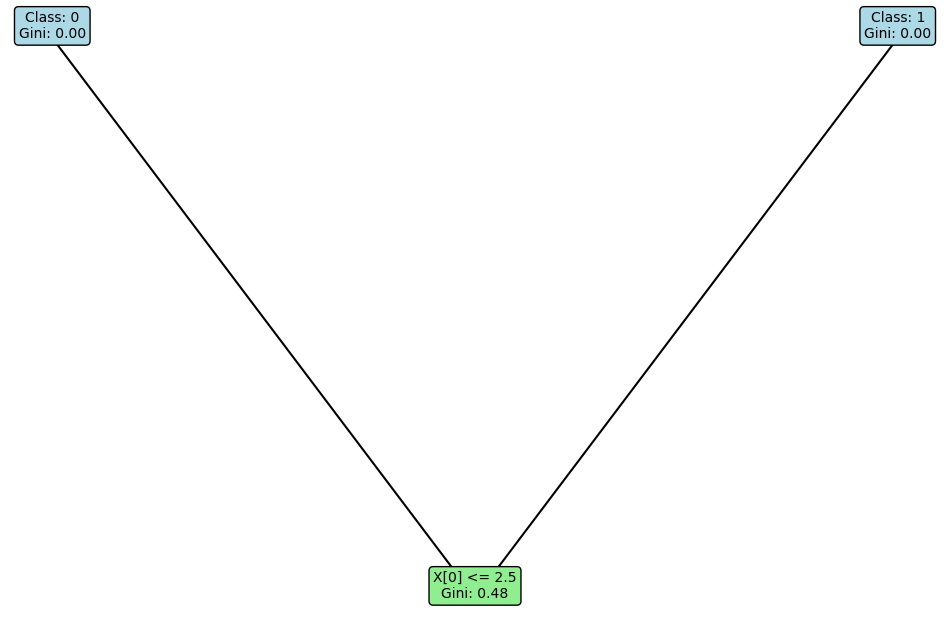

In [11]:
tree.display_tree()

In [23]:
## testing on anemia dataset

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv("./Anemia_dataset.csv")

In [14]:
X=df[["Gender","Hemoglobin","MCH","MCHC","MCV"]]
y=df["Result"]

In [15]:
X.shape,y.shape

((1421, 5), (1421,))

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [17]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
tree = DecisionTree()
tree.fit(X_train,y_train)

In [19]:
y_pred=tree.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [21]:
print("Accuracy:- ",accuracy_score(y_pred,y_test))
print("Precision:- ",precision_score(y_pred,y_test))
print("Recall:- ",recall_score(y_pred,y_test))
print("F1:- ",f1_score(y_pred,y_test))

Accuracy:-  1.0
Precision:-  1.0
Recall:-  1.0
F1:-  1.0


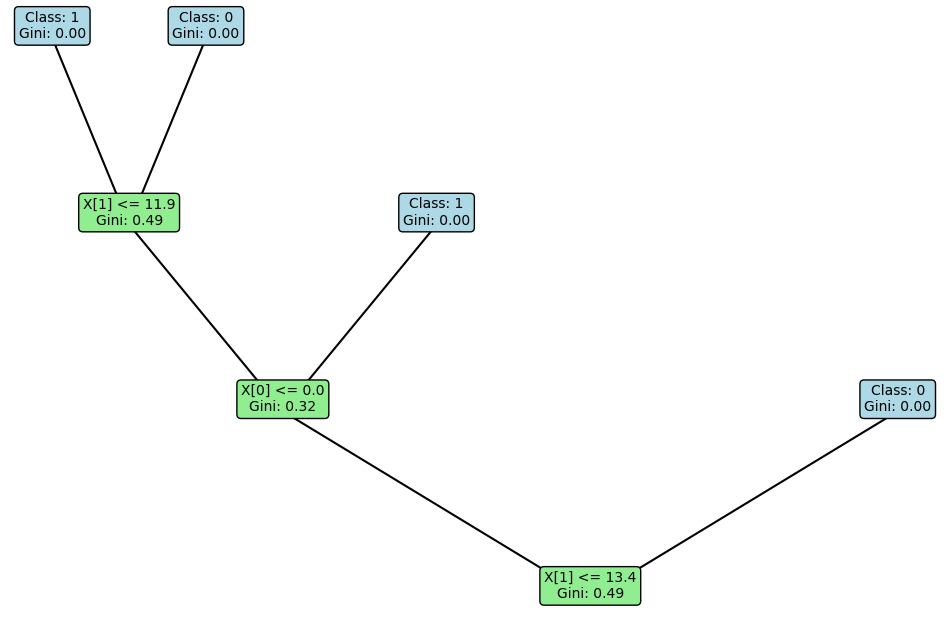

In [22]:
tree.display_tree()